In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import anndata
import dynamo as dyn
dyn.get_all_dependencies_version()

2023-12-11 15:59:57.539334: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-11 15:59:59.661764: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


package,tqdm,statsmodels,setuptools,scipy,scikit-learn,pandas,numpy,networkx,matplotlib,anndata,igraph,loompy,numdifftools,umap-learn,numba,seaborn,colorcet,pynndescent,pre-commit,get-version,openpyxl,typing-extensions,session-info,dynamo-release
version,4.65.0,0.14.0,68.0.0,1.10.0,1.2.2,1.5.3,1.22.3,2.8.4,3.7.1,0.9.1,0.10.4,3.0.7,0.9.41,0.5.3,0.56.4,0.12.2,3.0.1,0.5.8,3.2.0,3.5.4,3.2.0b1,4.5.0,1.0.0,1.3.3


In [2]:
adata = anndata.read("mouse_retina.h5ad")
dyn.pp.recipe_monocle(adata)
dyn.tl.reduceDimension(adata)
dyn.tl.dynamics(adata, model='stochastic', cores=100)
dyn.tl.cell_velocities(adata, method='cosine')
dyn.tl.cell_velocities(adata, basis='pca', method="cosine")

|-----? dynamo.preprocessing.deprecated is deprecated.
|-----> recipe_monocle_keep_filtered_cells_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_cells_key=True
|-----> recipe_monocle_keep_filtered_genes_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_filtered_genes_key=True
|-----> recipe_monocle_keep_raw_layers_key is None. Using default value from DynamoAdataConfig: recipe_monocle_keep_raw_layers_key=True
|-----> apply Monocole recipe to adata...
|-----> ensure all cell and variable names unique.
|-----> ensure all data in different layers in csr sparse matrix format.
|-----> ensure all labeling data properly collapased
|-----> filtering cells...
|-----> 2683 cells passed basic filters.
|-----> filtering gene...
|-----> 4836 genes passed basic filters.
|-----> calculating size factor...
|-----> selecting genes in layer: X, sort method: SVR...
|-----> size factor normalizing the data, followed by log1p transformation.

AnnData object with n_obs × n_vars = 2726 × 31053
    obs: 'Clusters', 'Annotation', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'paper_review_url', 'paper_url', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'dynamics', 'grid_velocity_umap', 'grid_velocity_pca'
    obsm: 'X_umap', 'X_pca', 'X', 'cell_cycle_scores', 'velocity_umap', 'velocity_pca'
    layers: 'spliced', 'unspliced', 'X_spliced', '

|-----------> plotting with basis key=X_umap
|-----------> skip filtering Annotation by stack threshold when stacking color because it is not a numeric type


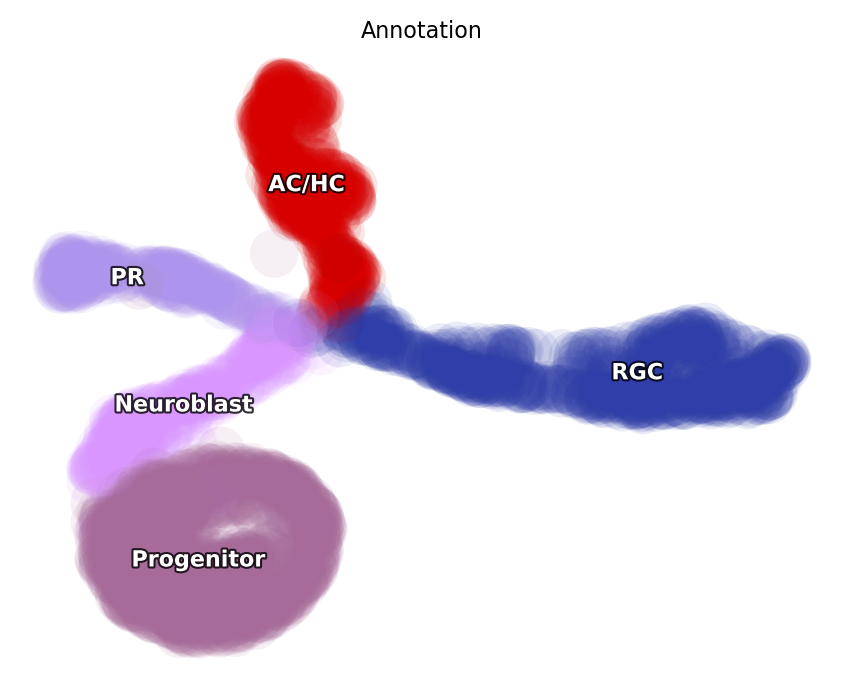

In [3]:
dyn.pl.umap(adata,color='Annotation')

|-----------> plotting with basis key=X_umap
|-----------> skip filtering Annotation by stack threshold when stacking color because it is not a numeric type


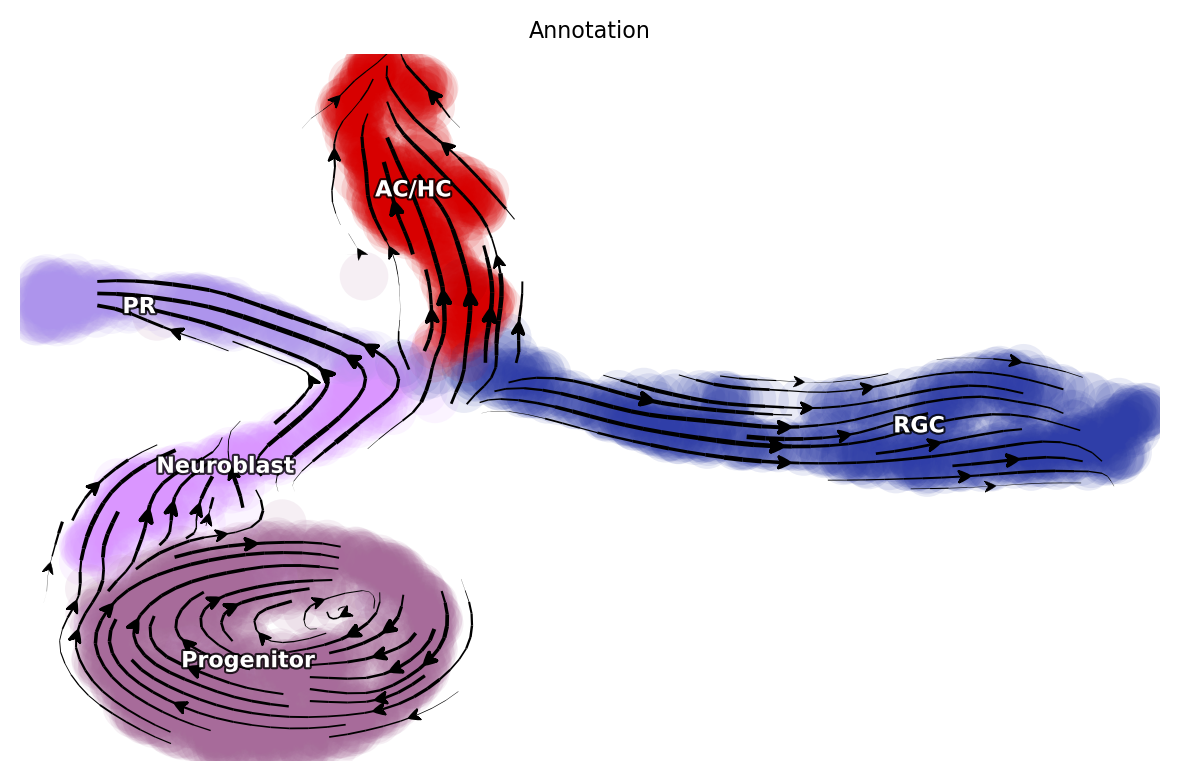

In [4]:
dyn.pl.streamline_plot(adata,color="Annotation",basis="umap",)

In [8]:
dyn.vf.VectorField(adata, basis='pca')
dyn.vf.VectorField(adata, basis='umap')

|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: PCA. 
        Vector field will be learned in the PCA space.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.1675s]
|-----> [VectorField] completed [0.2939s]
|-----> VectorField reconstruction begins...
|-----> Retrieve X and V based on basis: UMAP. 
        Vector field will be learned in the UMAP space.
|-----> Generating high dimensional grids and convert into a row matrix.
|-----> Learning vector field with method: sparsevfc.
|-----> [SparseVFC] begins...
|-----> Sampling control points based on data velocity magnitude...
|-----> [SparseVFC] completed [0.2537s]
|-----> [VectorField] completed [0.3528s]


In [6]:
dyn.vf.topography(adata, n=100, basis='umap')

AnnData object with n_obs × n_vars = 2726 × 31053
    obs: 'Clusters', 'Annotation', 'nGenes', 'nCounts', 'pMito', 'pass_basic_filter', 'Size_Factor', 'initial_cell_size', 'spliced_Size_Factor', 'initial_spliced_cell_size', 'unspliced_Size_Factor', 'initial_unspliced_cell_size', 'ntr', 'cell_cycle_phase', 'control_point_pca', 'inlier_prob_pca', 'obs_vf_angle_pca', 'control_point_umap', 'inlier_prob_umap', 'obs_vf_angle_umap'
    var: 'nCells', 'nCounts', 'pass_basic_filter', 'log_m', 'score', 'log_cv', 'frac', 'use_for_pca', 'ntr', 'beta', 'gamma', 'half_life', 'alpha_b', 'alpha_r2', 'gamma_b', 'gamma_r2', 'gamma_logLL', 'delta_b', 'delta_r2', 'bs', 'bf', 'uu0', 'ul0', 'su0', 'sl0', 'U0', 'S0', 'total0', 'use_for_dynamics', 'use_for_transition'
    uns: 'paper_review_url', 'paper_url', 'pp', 'velocyto_SVR', 'PCs', 'explained_variance_ratio_', 'pca_mean', 'pca_fit', 'feature_selection', 'cell_phase_genes', 'neighbors', 'dynamics', 'grid_velocity_umap', 'grid_velocity_pca', 'Annotation_c

|-----> Vector field for umap is but its topography is not mapped. Mapping topography now ...
|-----------> plotting with basis key=X_umap
|-----------> skip filtering Annotation by stack threshold when stacking color because it is not a numeric type


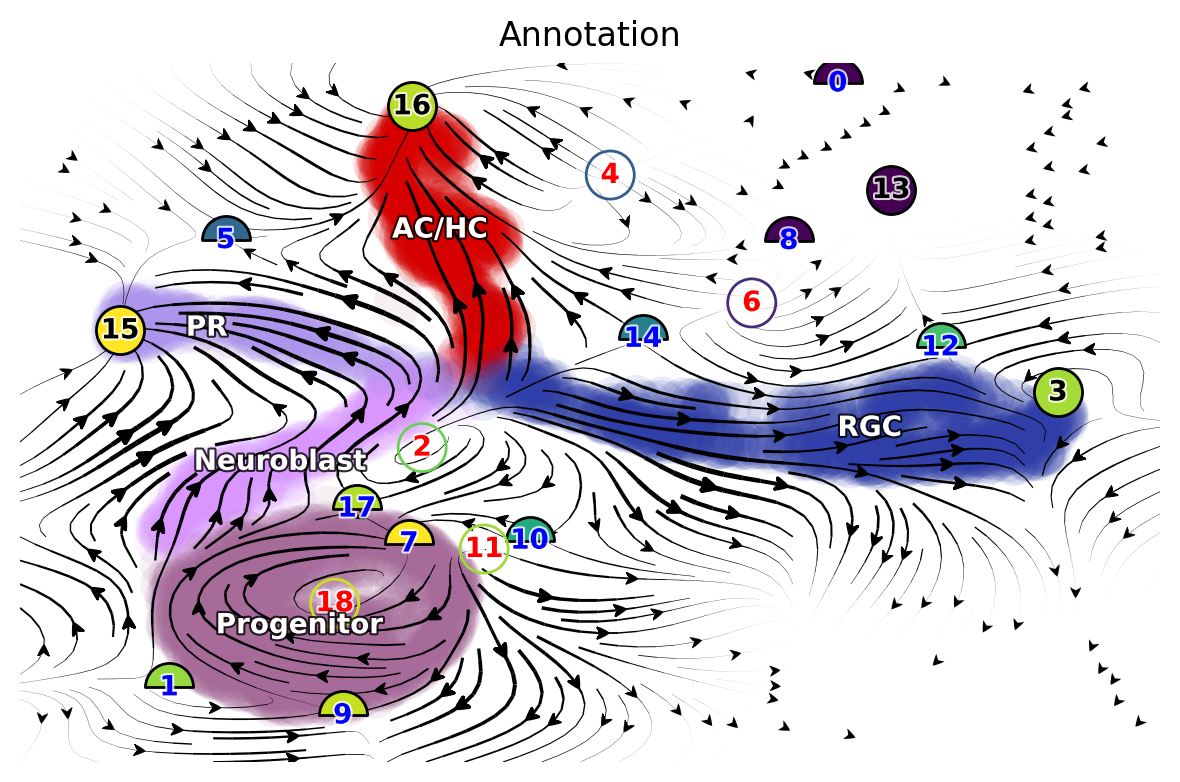

In [9]:
dyn.pl.topography(
    adata,
    color="Annotation",
    markersize=300,
    basis="umap",
    fps_basis="umap",
    streamline_alpha=1.0,
)

In [10]:
Xss, ftype = adata.uns['VecFld_umap']['Xss'], adata.uns['VecFld_umap']['ftype']
good_fixed_points = [18, 15, 16, 3]
adata.uns['VecFld_umap']['Xss'] = Xss[good_fixed_points]
adata.uns['VecFld_umap']['ftype'] = ftype[good_fixed_points]

|-----------> plotting with basis key=X_umap
|-----------> skip filtering Annotation by stack threshold when stacking color because it is not a numeric type


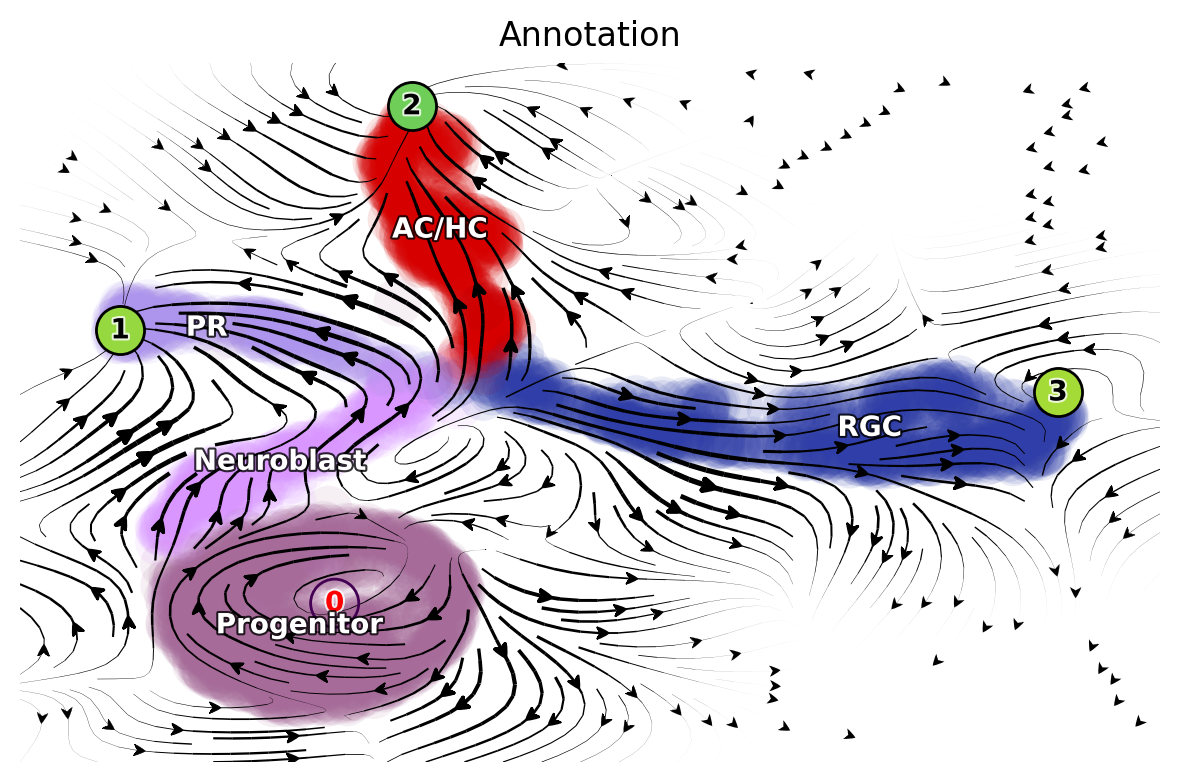

In [11]:
dyn.pl.topography(
    adata,
    color="Annotation",
    markersize=300,
    basis="umap",
    fps_basis="umap",
    streamline_alpha=1.0,
)